In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt 

%matplotlib inline

#These two lines will tell jupyter notebook to print all vars instead of last listed var
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
class XML2DataFrame:

    def __init__(self, xml_data):
        self.root = ET.XML(xml_data)

    def parse_root(self, root):
        return [self.parse_element(child) for child in iter(root)]

    def parse_element(self, element, parsed=None):
        if parsed is None:
            parsed = dict()
        for key in element.keys():
            parsed[key] = element.attrib.get(key)
        if element.text:
            parsed[element.tag] = element.text
        for child in list(element):
            self.parse_element(child, parsed)
        return parsed

    def process_data(self):
        structure_data = self.parse_root(self.root)
        return pd.DataFrame(structure_data)

In [ ]:
# Get list of XML file names from the data directory
import os 

files = []
directory = os.fsencode("data")
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".xml"): 
        #print(filename)
        files.append("data\\" + filename)
        continue
    else:
        continue
                     
files

In [ ]:
# Create an empty dataframe for us to add all our data into
master_df = pd.DataFrame()
master_df

In [ ]:
# Create an empty list for us to track column names for each year's worth of data
column_names = []

In [ ]:
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print('start time = ', st)

# For every xml file in the directory, convert xml file to dataframe
# Add the dataframe to the master dataframe
for f in files:
    xml_data = open(f).read()
    xml2df = XML2DataFrame(xml_data)
    xml_dataframe = xml2df.process_data()
    column_names.append(xml_dataframe.columns)
    master_df = pd.concat([master_df,xml_dataframe], ignore_index=True)
    open(f).close()
    
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print('end time = ', st)

In [ ]:
# Check the master dataframe
master_df.info()

In [ ]:
# Write the master dataframe to CSV
master_df.to_csv('TFS_OPEN_DATA-2011-2016.csv', encoding='utf-8', index=False)

In [ ]:
# Column names for each of the data files 
column_names

In [ ]:
# Find the differences in column names between the data
# Print the columns which were found in one data set but not another
for i in range(1, len(column_names)):
    print ("i = " + str(i))
    print (set(column_names[i]) - set(column_names[i-1]))
    print (set(column_names[i-1]) - set(column_names[i]))

In [ ]:
# Let's shorten the dataframe name so we can write code easier and peek at the data
df = master_df
df.head(10)

In [2]:
df = pd.read_csv('TFS_OPEN_DATA-2011-2016.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (43,50,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,AGE_OF_STRUCTURE,AID_TO_FROM_OTHER_DEPTS,ALARM_TO_FD,AREA_OF_ORIGIN,ARRIVE_DATE,ARRIVE_TIME,BLD_HEIGHT,...,SMOKE_ALARM_PRESENCE_AND_OPERATION_MAIN_FLOOR,SMOKE_ALARM_TYPE,SPRINKLER_SYSTEM_ACTIVATION,SPRINKLER_SYSTEM_PRESENCE,STATUS_ON_ARRIVAL,TOTAL_NUM_PERSONNEL,TSSA,VEH_FUEL,VEH_PURPOSE,WATER
0,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:10:02,2011-01-01 00:10:02,0,...,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:09:02,2011-01-01 00:09:02,0,...,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:09:34,2011-01-01 00:09:34,0,...,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:10:46,2011-01-01 00:10:46,0,...,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1,5.0,NaN,2011-01-01 00:11:03,2011-01-01 00:12:38,0,...,NaN,NaN,NaN,NaN,NaN,14,,NaN,NaN,NaN


In [4]:
# Drop the columns from our <Responding Units> sub data since we weren't able to import them correctly
# There are multiple Responding Units made of these 5 attributes EACH but we were only able to read in
# one of possibly many Responding Units data so, we'll discard for now as it is incomplete data
df = df.drop(['CAD_UNIT_ID','DISPATCH_TIME','ENROUTE_TIME','ARRIVE_TIME','CLEAR_TIME'], axis=1)

In [5]:
# Note that there are 107 columns, but not all of them can be shown on screen
# So let's peek at the first few rows, 10 columns at a time to look at a sample of the data
for i in range(0, len(df.columns), 10):
    df.iloc[:,i:i+10].head()

,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,AGE_OF_STRUCTURE,AID_TO_FROM_OTHER_DEPTS,ALARM_TO_FD,AREA_OF_ORIGIN,ARRIVE_DATE,BLD_HEIGHT,BLD_STATUS
0,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:10:02,0,NaN
1,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:09:02,0,NaN
2,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:09:34,0,NaN
3,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:10:46,0,NaN
4,NaN,NaN,NaN,NaN,1,5.0,NaN,2011-01-01 00:11:03,0,NaN


,CANUTEC,CIVILIAN_FIRE_FATALITY,CIVILIAN_FIRE_INJURY,CIV_EVACUATION,CIV_EVACUATION_REASON_1,CIV_EVACUATION_REASON_2,CIV_FIRE_CONTROL,COMPLEX,CONTROL_DATE,CONTROL_HOUR
0,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,CONTROL_MIN,CONTROL_SEC,CROSS_STREET,DISPATCH_DATE,DISPATCH_HOUR,DISPATCH_MIN,DISPATCH_SEC,EMS,ESA,EST_KM
0,NaN,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,,,1
1,NaN,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,,,1
2,NaN,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,,,1
3,NaN,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,,,2
4,NaN,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,,,1


,EST_LOSS,EST_NUM_PERSONS_DISPLACED,EST_VALUE_AT_RISK,EVENT_ALARM_LEVEL,EVENT_TYPE,EVENT_TYPE_CD,EXTENT_FIRE,EXTENT_SMOKE,FD_STATION,FF_FATALITIES
0,0,0,NaN,NaN,Medical,MEB,NaN,NaN,F11000010000,0
1,0,0,NaN,NaN,Carbon Monoxide - Non Medical,CONM,NaN,NaN,F11000011000,0
2,0,0,NaN,NaN,Medical,MEPI,NaN,NaN,F11000012000,0
3,0,0,NaN,NaN,Fire - Grass/Rubbish,FIG,NaN,NaN,F11000013000,0
4,0,0,NaN,NaN,Alarm Highrise Residential,FAHR,NaN,NaN,F11000014000,0


,FF_INJURIES,FIRE_ALARM_SYSTEM_IMPACT,FIRE_ALARM_SYSTEM_OPERATION,FIRE_ALARM_SYSTEM_PRESENCE,FIRE_CONTROL,FIRE_DEPT_INCIDENT,FSA,FUEL_OF_IGNITION_SOURCE,GAS,HYDRO
0,0,NaN,NaN,NaN,NaN,NaN,M6N,NaN,,
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2,0,NaN,NaN,NaN,NaN,NaN,M4M,NaN,,
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


,IGNITION_SOURCE,INCIDENT_DATE,INCIDENT_NUMBER,INITIAL_CALL_HOUR,INITIAL_CALL_MIN,INITIAL_CALL_SEC,INITIAL_DETECTION,INITIAL_UNIT_PERSONNEL,INSURANCE_ESTIMATE,LEVEL_OF_ORIGIN
0,NaN,01/01/2011,F11000010,0,3,43,NaN,4,NaN,NaN
1,NaN,01/01/2011,F11000011,0,3,55,NaN,4,NaN,NaN
2,NaN,01/01/2011,F11000012,0,5,3,NaN,4,NaN,NaN
3,NaN,01/01/2011,F11000013,0,4,46,NaN,4,NaN,NaN
4,NaN,01/01/2011,F11000014,0,6,7,NaN,4,NaN,NaN


,MAIN_STREET,MOE,MOL,MUNICIPAL_BUILDING_OFFICE,MUNICIPAL_HEALTH_OFFICE,MUNICIPAL_POLICE,OBJECT_OR_MATERIAL_FIRST_IGNITED,OCC_STATUS,OCC_TYPE,OFM_INVESTIGATIONS_CONTACTED
0,NaN,,,,,,NaN,NaN,NaN,0
1,MOUNT PLEASANT RD,,,,,,NaN,NaN,NaN,0
2,NaN,,,,,,NaN,NaN,NaN,0
3,DUFFERIN ST,,,,,,NaN,NaN,NaN,0
4,SAN ROMANOWAY,,,,,,NaN,NaN,NaN,0


,ONSCENE_HOUR,ONSCENE_MIN,ONSCENE_SEC,OPP,OTHER,PHYSICAL_CONDITION_1,PHYSICAL_CONDITION_2,PHYSICAL_CONDITION_3,POSSIBLE_BUSINESS_IMPACT,POSSIBLE_CAUSE
0,0.0,10.0,2.0,,,NaN,NaN,NaN,NaN,NaN
1,0.0,9.0,2.0,,,NaN,NaN,NaN,NaN,NaN
2,0.0,9.0,34.0,,,NaN,NaN,NaN,NaN,NaN
3,0.0,10.0,46.0,,,NaN,NaN,NaN,NaN,NaN
4,0.0,11.0,3.0,,,NaN,NaN,NaN,NaN,NaN


,PROPERTY,RESCUED_ADULTS,RESCUED_CHILDREN,RESCUED_SENIORS,RESCUES,RESPONDING_UNITS,RESPONSE_TYPE,SMOKE_ALARM_FAILURE_TO_OPERATE,SMOKE_ALARM_IMPACT_ON_EVAC,SMOKE_ALARM_IMPACT_ON_NUM_EVAC
0,301,0,0,0,0,1.0,89,NaN,NaN,0
1,301,0,0,0,0,1.0,38,NaN,NaN,0
2,302,0,0,0,0,1.0,89,NaN,NaN,0
3,861,0,0,0,0,1.0,3,NaN,NaN,0
4,323,0,0,0,0,4.0,33,NaN,NaN,0


,SMOKE_ALARM_ON_ALL_FLOORS,SMOKE_ALARM_OTHER_FLOOR_PRESENCE,SMOKE_ALARM_PRESENCE_AND_OPERATION_MAIN_FLOOR,SMOKE_ALARM_TYPE,SPRINKLER_SYSTEM_ACTIVATION,SPRINKLER_SYSTEM_PRESENCE,STATUS_ON_ARRIVAL,TOTAL_NUM_PERSONNEL,TSSA,VEH_FUEL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,,NaN


,VEH_PURPOSE,WATER
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [6]:
# Describe the data 10 columns at a time
for i in range(0, len(df.columns), 10):
    df.iloc[:,i:i+10].describe(include='all')

,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,AGE_OF_STRUCTURE,AID_TO_FROM_OTHER_DEPTS,ALARM_TO_FD,AREA_OF_ORIGIN,ARRIVE_DATE,BLD_HEIGHT,BLD_STATUS
count,12330.000000,12330.000000,12330.000000,8781.000000,720370.000000,720369.000000,12330.000000,703568,720370.000000,8781.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,702206,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-28 08:06:32,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
mean,13.016221,29.183698,15.863909,4.486619,3.948327,3.018321,52.261800,NaN,0.745987,1.564173
std,6.731811,17.383903,19.192811,2.236060,0.390321,1.396097,26.564199,NaN,25.721413,1.791434
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.000000,NaN,0.000000,1.000000
25%,8.000000,14.000000,0.000000,3.000000,4.000000,3.000000,24.000000,NaN,0.000000,1.000000
50%,14.000000,29.500000,4.000000,4.000000,4.000000,3.000000,50.000000,NaN,0.000000,1.000000
75%,19.000000,44.750000,30.000000,5.000000,4.000000,3.000000,79.000000,NaN,0.000000,1.000000


,CANUTEC,CIVILIAN_FIRE_FATALITY,CIVILIAN_FIRE_INJURY,CIV_EVACUATION,CIV_EVACUATION_REASON_1,CIV_EVACUATION_REASON_2,CIV_FIRE_CONTROL,COMPLEX,CONTROL_DATE,CONTROL_HOUR
count,720370,720370.000000,720370.000000,12329.000000,12329.000000,105.000000,12329.000000,8781.000000,241537,12549.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2181,NaN
top,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/00,NaN
freq,720138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228988,NaN
mean,NaN,0.000085,0.001224,2.608565,7.143888,6.038095,2.984833,50.761189,NaN,13.017133
std,NaN,0.010862,0.049103,1.670131,2.422162,3.240144,2.048570,45.892300,NaN,6.729716
min,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000
25%,NaN,0.000000,0.000000,1.000000,8.000000,3.000000,1.000000,3.000000,NaN,8.000000
50%,NaN,0.000000,0.000000,3.000000,8.000000,8.000000,3.000000,20.000000,NaN,14.000000
75%,NaN,0.000000,0.000000,4.000000,8.000000,9.000000,4.000000,98.000000,NaN,19.000000


,CONTROL_MIN,CONTROL_SEC,CROSS_STREET,DISPATCH_DATE,DISPATCH_HOUR,DISPATCH_MIN,DISPATCH_SEC,EMS,ESA,EST_KM
count,12549.000000,12549.000000,330021,719679,720193.000000,720193.000000,720193.000000,720370,720370,720370.000000
unique,NaN,NaN,11025,718149,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,YONGE ST,2014-03-28 10:32:55,NaN,NaN,NaN,,,NaN
freq,NaN,NaN,6409,4,NaN,NaN,NaN,720325,720080,NaN
mean,28.967886,18.825245,NaN,NaN,12.953839,29.499231,29.501899,NaN,NaN,2.536828
std,17.468068,19.579309,NaN,NaN,6.364254,17.308797,17.315648,NaN,NaN,2.096576
min,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,-1.000000
25%,14.000000,0.000000,NaN,NaN,9.000000,15.000000,15.000000,NaN,NaN,2.000000
50%,30.000000,13.000000,NaN,NaN,13.000000,30.000000,29.000000,NaN,NaN,2.000000
75%,45.000000,35.000000,NaN,NaN,18.000000,44.000000,45.000000,NaN,NaN,3.000000


,EST_LOSS,EST_NUM_PERSONS_DISPLACED,EST_VALUE_AT_RISK,EVENT_ALARM_LEVEL,EVENT_TYPE,EVENT_TYPE_CD,EXTENT_FIRE,EXTENT_SMOKE,FD_STATION,FF_FATALITIES
count,7.203700e+05,720370.000000,12412.000000,117426.000000,720290,720338,8785.000000,8785.000000,720370.0,720370.0
unique,NaN,NaN,NaN,NaN,114,130,NaN,NaN,375479.0,NaN
top,NaN,NaN,NaN,NaN,Medical,Medical,NaN,NaN,0.0,NaN
freq,NaN,NaN,NaN,NaN,354742,158831,NaN,NaN,343538.0,NaN
mean,4.651726e+02,0.216719,12.765227,0.006157,NaN,NaN,2.944223,9.503813,NaN,0.0
std,2.377162e+04,13.344641,29.129809,0.101701,NaN,NaN,8.677514,21.090830,NaN,0.0
min,0.000000e+00,0.000000,1.000000,0.000000,NaN,NaN,1.000000,2.000000,NaN,0.0
25%,0.000000e+00,0.000000,2.000000,0.000000,NaN,NaN,1.000000,2.000000,NaN,0.0
50%,0.000000e+00,0.000000,2.000000,0.000000,NaN,NaN,2.000000,4.000000,NaN,0.0
75%,0.000000e+00,0.000000,5.000000,0.000000,NaN,NaN,2.000000,7.000000,NaN,0.0


,FF_INJURIES,FIRE_ALARM_SYSTEM_IMPACT,FIRE_ALARM_SYSTEM_OPERATION,FIRE_ALARM_SYSTEM_PRESENCE,FIRE_CONTROL,FIRE_DEPT_INCIDENT,FSA,FUEL_OF_IGNITION_SOURCE,GAS,HYDRO
count,720370.000000,8781.000000,8781.000000,8781.000000,12330.000000,344884,365309,12330.000000,720370,720370
unique,NaN,NaN,NaN,NaN,NaN,344866,119,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,F15048892000,M5A,NaN,,
freq,NaN,NaN,NaN,NaN,NaN,4,10398,NaN,715150,715966
mean,0.000373,5.702312,4.543788,3.256007,1.674371,NaN,NaN,50.843471,NaN,NaN
std,0.024287,3.047831,3.540627,3.264821,1.105352,NaN,NaN,46.222753,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,0.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,4.000000,NaN,NaN
50%,0.000000,7.000000,2.000000,1.000000,1.000000,NaN,NaN,13.000000,NaN,NaN
75%,0.000000,8.000000,8.000000,8.000000,3.000000,NaN,NaN,99.000000,NaN,NaN


,IGNITION_SOURCE,INCIDENT_DATE,INCIDENT_NUMBER,INITIAL_CALL_HOUR,INITIAL_CALL_MIN,INITIAL_CALL_SEC,INITIAL_DETECTION,INITIAL_UNIT_PERSONNEL,INSURANCE_ESTIMATE,LEVEL_OF_ORIGIN
count,12330.000000,720370,720338,720370.000000,720370.000000,720370.000000,8786.000000,720370.000000,12412.000000,8781
unique,NaN,2192,720311,NaN,NaN,NaN,NaN,NaN,NaN,57
top,NaN,22/12/2013,F15066701,NaN,NaN,NaN,NaN,NaN,NaN,001
freq,NaN,2752,4,NaN,NaN,NaN,NaN,NaN,NaN,3437
mean,344.025223,NaN,NaN,12.953513,29.486386,29.486100,4.704075,3.823512,5.517241,NaN
std,438.305932,NaN,NaN,6.360580,17.309359,17.330296,2.197287,0.726919,3.354577,NaN
min,11.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,30.000000,NaN,NaN,9.000000,14.000000,14.000000,2.000000,4.000000,2.000000,NaN
50%,77.000000,NaN,NaN,13.000000,29.000000,30.000000,6.000000,4.000000,8.000000,NaN
75%,999.000000,NaN,NaN,18.000000,44.000000,45.000000,6.000000,4.000000,9.000000,NaN


,MAIN_STREET,MOE,MOL,MUNICIPAL_BUILDING_OFFICE,MUNICIPAL_HEALTH_OFFICE,MUNICIPAL_POLICE,OBJECT_OR_MATERIAL_FIRST_IGNITED,OCC_STATUS,OCC_TYPE,OFM_INVESTIGATIONS_CONTACTED
count,354910,720370,720370,720370,720370,720370,12330.000000,8781.000000,8781.000000,720370.000000
unique,10633,2,2,2,2,2,NaN,NaN,NaN,NaN
top,,,,,,,NaN,NaN,NaN,NaN
freq,55096,719011,720080,720142,719008,718973,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,57.287105,1.939870,2.590366,0.001588
std,NaN,NaN,NaN,NaN,NaN,NaN,26.580936,2.261751,2.324710,0.039819
min,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,1.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,1.000000,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,1.000000,2.000000,0.000000


,ONSCENE_HOUR,ONSCENE_MIN,ONSCENE_SEC,OPP,OTHER,PHYSICAL_CONDITION_1,PHYSICAL_CONDITION_2,PHYSICAL_CONDITION_3,POSSIBLE_BUSINESS_IMPACT,POSSIBLE_CAUSE
count,704999.000000,704999.000000,704999.000000,720370,720370,12329.000000,47.000000,7.000000,8785.000000,12330.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,719431,717388,NaN,NaN,NaN,NaN,NaN
mean,12.968655,29.531011,29.451555,NaN,NaN,56.899586,59.404255,57.142857,4.736255,53.545904
std,6.369351,17.311981,17.340799,NaN,NaN,47.906928,47.645274,52.206093,3.489868,30.187137
min,0.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,15.000000,14.000000,NaN,NaN,1.000000,1.000000,1.500000,1.000000,44.000000
50%,14.000000,30.000000,29.000000,NaN,NaN,98.000000,98.000000,99.000000,8.000000,50.000000
75%,18.000000,45.000000,44.000000,NaN,NaN,98.000000,98.000000,99.000000,8.000000,60.000000


,PROPERTY,RESCUED_ADULTS,RESCUED_CHILDREN,RESCUED_SENIORS,RESCUES,RESPONDING_UNITS,RESPONSE_TYPE,SMOKE_ALARM_FAILURE_TO_OPERATE,SMOKE_ALARM_IMPACT_ON_EVAC,SMOKE_ALARM_IMPACT_ON_NUM_EVAC
count,710507.0,720370.000000,720370.000000,720370.000000,720370.000000,720338.000000,720370.00000,8781.000000,8781.000000,720370.000000
unique,627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,196014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.000923,0.000136,0.000204,0.026538,2.283411,67.17408,73.839540,5.013210,0.230744
std,NaN,0.077282,0.017316,0.022198,0.371500,2.234218,39.80317,40.839988,3.194751,4.459870
min,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,34.00000,9.000000,1.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,89.00000,98.000000,7.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,89.00000,98.000000,8.000000,0.000000


,SMOKE_ALARM_ON_ALL_FLOORS,SMOKE_ALARM_OTHER_FLOOR_PRESENCE,SMOKE_ALARM_PRESENCE_AND_OPERATION_MAIN_FLOOR,SMOKE_ALARM_TYPE,SPRINKLER_SYSTEM_ACTIVATION,SPRINKLER_SYSTEM_PRESENCE,STATUS_ON_ARRIVAL,TOTAL_NUM_PERSONNEL,TSSA,VEH_FUEL
count,8781.000000,8781.000000,8781.000000,8781.000000,8781.000000,8781.000000,12330.000000,720370.000000,720370,1739.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719822,NaN
mean,4.349049,4.791254,2.931329,4.757545,6.254299,3.576814,3.008516,8.043410,NaN,4.073606
std,3.633355,2.997842,2.421703,3.161500,2.825953,2.505426,1.975314,7.099159,NaN,16.263838
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.000000
25%,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,NaN,1.000000
50%,2.000000,3.000000,2.000000,4.000000,8.000000,3.000000,3.000000,4.000000,NaN,1.000000
75%,9.000000,8.000000,3.000000,8.000000,8.000000,3.000000,4.000000,13.000000,NaN,1.000000


,VEH_PURPOSE,WATER
count,1739.000000,12330.000000
mean,4.246694,2.472912
std,13.442653,2.388659
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,5.000000
max,99.000000,9.000000


## Data Wrangling

In [7]:
# From the column comparison that we did as we were processing each year's worth of data
# we see that EVENT_ALARM_LEVEL and FIRE_DEPT_INCIDENT data were missing from some data sets
# So we'll drop those incomplete attributes 
df = df.drop(['EVENT_ALARM_LEVEL','FIRE_DEPT_INCIDENT'], axis=1)

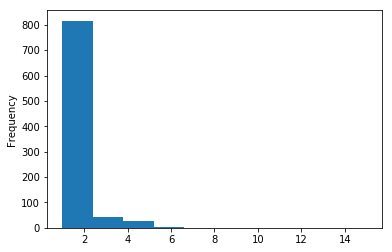

In [8]:
# We will combine all injuries and fatalities into a total number of injuries attribute
df['Injuries'] = (df.filter(regex='INJUR|FATAL').astype(int)).sum(axis=1)

# Let's see what the spread of injuries look like
df[df['Injuries']>0].Injuries.sort_values().plot(kind='hist')

In [9]:
# Since there isn't great variety in the number of injuries, let's refine
# this attribute to 0 for no injury, 1 for (any number of) injuries exist
df['Injuries'] = (df['Injuries'] > 0).astype(int)
df['Injuries'].groupby(df['Injuries']).count()

Injuries
0    719479
1       891
Name: Injuries, dtype: int64

In [ ]:
# Remove the attribues we no longer need
df = df.drop(df.filter(regex='INJUR|FATAL').columns, axis=1)

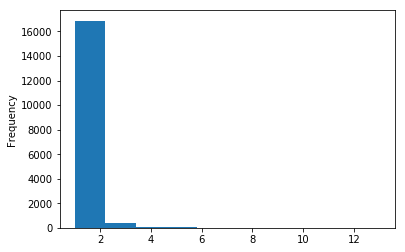

In [10]:
# Combine number of the other agencies and/or parties contacted to a single attribute
other_contacts = ['OPP','MOE','TSSA','ESA','MOL','EMS','CANUTEC','GAS','HYDRO','MUNICIPAL_BUILDING_OFFICE','MUNICIPAL_HEALTH_OFFICE','MUNICIPAL_POLICE','OFM_INVESTIGATIONS_CONTACTED','OTHER']

# We'll start by converting the blank spaces to numeric values
for contact in other_contacts:
    df[contact] = pd.to_numeric(df[contact], errors='coerce').fillna(0)
df['OTHERS_CONTACTED'] = df[other_contacts].astype(int).sum(axis=1)

# Let's see what the data spread looks like
df[df['OTHERS_CONTACTED']>0].OTHERS_CONTACTED.sort_values().plot(kind='hist')

In [11]:
# Since there isn't great variety in the number other agencies contacted, let's refine
# this attribute to 0 for no other agency contacted, 1 for (any number of) other agency contacted
df['OTHERS_CONTACTED'] = (df['OTHERS_CONTACTED'] > 0).astype(int)
df['OTHERS_CONTACTED'].groupby(df['OTHERS_CONTACTED']).count()

OTHERS_CONTACTED
0    702941
1     17429
Name: OTHERS_CONTACTED, dtype: int64

In [12]:
# Remove the attribues we no longer need
df = df.drop(df[other_contacts], axis=1)

In [13]:
# Let's look at the data that has date and time info
df.filter(regex='DATE|HOUR|MIN|SEC|TIME').head()

,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,ARRIVE_DATE,CONTROL_DATE,CONTROL_HOUR,CONTROL_MIN,CONTROL_SEC,DISPATCH_DATE,DISPATCH_HOUR,DISPATCH_MIN,DISPATCH_SEC,INCIDENT_DATE,INITIAL_CALL_HOUR,INITIAL_CALL_MIN,INITIAL_CALL_SEC,ONSCENE_HOUR,ONSCENE_MIN,ONSCENE_SEC
0,NaN,NaN,NaN,2011-01-01 00:10:02,NaN,NaN,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,01/01/2011,0,3,43,0.0,10.0,2.0
1,NaN,NaN,NaN,2011-01-01 00:09:02,NaN,NaN,NaN,NaN,2011-01-01 00:04:46,0.0,4.0,46.0,01/01/2011,0,3,55,0.0,9.0,2.0
2,NaN,NaN,NaN,2011-01-01 00:09:34,NaN,NaN,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,01/01/2011,0,5,3,0.0,9.0,34.0
3,NaN,NaN,NaN,2011-01-01 00:10:46,NaN,NaN,NaN,NaN,2011-01-01 00:06:33,0.0,6.0,33.0,01/01/2011,0,4,46,0.0,10.0,46.0
4,NaN,NaN,NaN,2011-01-01 00:11:03,NaN,NaN,NaN,NaN,2011-01-01 00:06:41,0.0,6.0,41.0,01/01/2011,0,6,7,0.0,11.0,3.0


In [14]:
# We can see that 'dispatch' information has lots of repeated data
# Let's see if we can optimize by filling in missing data and removing duplicate data
# Let's see again what that data looks like
df.filter(regex='DISPATCH|INCIDENT_DATE').describe(include='all')
df.filter(regex='DISPATCH|INCIDENT_DATE').head()

,DISPATCH_DATE,DISPATCH_HOUR,DISPATCH_MIN,DISPATCH_SEC,INCIDENT_DATE
count,719679,720193.000000,720193.000000,720193.000000,720370
unique,718149,NaN,NaN,NaN,2192
top,2014-03-28 10:32:55,NaN,NaN,NaN,22/12/2013
freq,4,NaN,NaN,NaN,2752
mean,NaN,12.953839,29.499231,29.501899,NaN
std,NaN,6.364254,17.308797,17.315648,NaN
min,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,9.000000,15.000000,15.000000,NaN
50%,NaN,13.000000,30.000000,29.000000,NaN
75%,NaN,18.000000,44.000000,45.000000,NaN


,DISPATCH_DATE,DISPATCH_HOUR,DISPATCH_MIN,DISPATCH_SEC,INCIDENT_DATE
0,2011-01-01 00:04:13,0.0,4.0,13.0,01/01/2011
1,2011-01-01 00:04:46,0.0,4.0,46.0,01/01/2011
2,2011-01-01 00:05:50,0.0,5.0,50.0,01/01/2011
3,2011-01-01 00:06:33,0.0,6.0,33.0,01/01/2011
4,2011-01-01 00:06:41,0.0,6.0,41.0,01/01/2011


In [15]:
# We'll try and fill in DISPATCH_DATE it is most complete (within the row) with date and time info 
# First we'll convert the INCIDENT_DATE and DISPATCH_DATE to datetime type so we can work with it easier
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'], format='%d/%m/%Y')
df['DISPATCH_DATE'] = pd.to_datetime(df['DISPATCH_DATE'], format='%Y-%m-%d %H:%M:%S')

# Next, we'll get indices for rows where DISPATCH_DATE is missing data but data exists for the time attributes
dispatchix = df[df.DISPATCH_DATE.isnull() & df.DISPATCH_HOUR.notnull() & df.DISPATCH_MIN.notnull() & df.DISPATCH_SEC.notnull()].index

# We'll fill in missing time values with 0 so we can convert the attribute to an int
df['DISPATCH_HOUR'] = df['DISPATCH_HOUR'].fillna(0)
df['DISPATCH_MIN'] = df['DISPATCH_MIN'].fillna(0)
df['DISPATCH_SEC'] = df['DISPATCH_SEC'].fillna(0)
df['DISPATCH_HOUR'] = df['DISPATCH_HOUR'].astype(int)
df['DISPATCH_MIN'] = df['DISPATCH_MIN'].astype(int)
df['DISPATCH_SEC'] = df['DISPATCH_SEC'].astype(int)

# Create a temp attribute to contain our combined dispatch date and time information 
df['DISPATCH_TEMP'] = df['INCIDENT_DATE'] + pd.to_timedelta(df.DISPATCH_SEC, unit='s') + pd.to_timedelta(df.DISPATCH_MIN, unit='m') + pd.to_timedelta(df.DISPATCH_HOUR, unit='h')

# Replace our missing data with the data that we've constructed
for ix in dispatchix:
    df.loc[ix,'DISPATCH_DATE'] = df.loc[ix,'DISPATCH_TEMP']

# Confirm that we have fewer missing values now
df.DISPATCH_DATE.describe()

count                  720367
unique                 718832
top       2013-08-03 16:25:57
freq                        4
first     2011-01-01 00:02:50
last      2016-12-31 23:59:58
Name: DISPATCH_DATE, dtype: object

In [16]:
# Since we can't fill in anymore values, we'll drop the attributes that we no longer need
df = df.drop(['DISPATCH_HOUR','DISPATCH_MIN','DISPATCH_SEC'], axis=1)

In [17]:
# We'll do similarly as above for ARRIVE_DATE and ONSCENE_HOUR/MIN/SEC
df['ARRIVE_DATE'] = pd.to_datetime(df['ARRIVE_DATE'], format='%Y-%m-%d %H:%M:%S')
arriveix = df[df.ARRIVE_DATE.isnull() & df.ONSCENE_HOUR.notnull() & df.ONSCENE_MIN.notnull() & df.ONSCENE_SEC.notnull()].index
df['ONSCENE_HOUR'] = df['ONSCENE_HOUR'].fillna(0)
df['ONSCENE_MIN'] = df['ONSCENE_MIN'].fillna(0)
df['ONSCENE_SEC'] = df['ONSCENE_SEC'].fillna(0)
df['ONSCENE_HOUR'] = df['ONSCENE_HOUR'].astype(int)
df['ONSCENE_MIN'] = df['ONSCENE_MIN'].astype(int)
df['ONSCENE_SEC'] = df['ONSCENE_SEC'].astype(int)
df['ARRIVE_TEMP'] = df['INCIDENT_DATE'] + pd.to_timedelta(df.ONSCENE_SEC, unit='s') + pd.to_timedelta(df.ONSCENE_MIN, unit='m') + pd.to_timedelta(df.ONSCENE_HOUR, unit='h')
for ix in dispatchix:
    df.loc[ix,'ARRIVE_DATE'] = df.loc[ix,'ARRIVE_TEMP']
df = df.drop(df.filter(regex='ONSCENE_|ARRIVE_TEMP').columns, axis=1)

In [18]:
# TO DO: Combine other time fields into one datetime field OR drop them
df.filter(regex='DATE|HOUR|MIN|SEC').head()

,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,ARRIVE_DATE,CONTROL_DATE,CONTROL_HOUR,CONTROL_MIN,CONTROL_SEC,DISPATCH_DATE,INCIDENT_DATE,INITIAL_CALL_HOUR,INITIAL_CALL_MIN,INITIAL_CALL_SEC
0,NaN,NaN,NaN,2011-01-01 00:10:02,NaN,NaN,NaN,NaN,2011-01-01 00:04:13,2011-01-01,0,3,43
1,NaN,NaN,NaN,2011-01-01 00:09:02,NaN,NaN,NaN,NaN,2011-01-01 00:04:46,2011-01-01,0,3,55
2,NaN,NaN,NaN,2011-01-01 00:09:34,NaN,NaN,NaN,NaN,2011-01-01 00:05:50,2011-01-01,0,5,3
3,NaN,NaN,NaN,2011-01-01 00:10:46,NaN,NaN,NaN,NaN,2011-01-01 00:06:33,2011-01-01,0,4,46
4,NaN,NaN,NaN,2011-01-01 00:11:03,NaN,NaN,NaN,NaN,2011-01-01 00:06:41,2011-01-01,0,6,7


In [19]:
# There are also a number of columns with "RESCUE" in the name
df.filter(regex='RESCUE').head()

,RESCUED_ADULTS,RESCUED_CHILDREN,RESCUED_SENIORS,RESCUES
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [20]:
# We'll combine the RESCUED_* attributes to form a sum
df['RESCUE_SUM'] = (df['RESCUED_ADULTS'] + df['RESCUED_CHILDREN'] + df['RESCUED_SENIORS'])

# And compare the sum with the RESCUES column to see if they're the same data
df[df.RESCUES>0].shape
df[(df.RESCUE_SUM == df.RESCUES) & df.RESCUES>0].shape

(7907, 84)

(209, 84)

In [21]:
df[(df.RESCUE_SUM != df.RESCUES) & df.RESCUES>0].shape
df[(df.RESCUE_SUM != df.RESCUES) & df.RESCUES>0][['RESCUE_SUM','RESCUES']].head()

(5146, 84)

,RESCUE_SUM,RESCUES
149,0,1
284,0,3
618,0,1
668,0,3
828,0,1


In [22]:
df[(df.RESCUE_SUM != df.RESCUES) & df.RESCUE_SUM>0].shape
df[(df.RESCUE_SUM != df.RESCUES) & df.RESCUE_SUM>0][['RESCUE_SUM','RESCUES']].head()

(71, 84)

,RESCUE_SUM,RESCUES
6448,5,0
9149,3,0
9276,1,0
11501,1,0
12213,1,0


In [23]:
# Looks like we have very few crossovers
# In other words, RESUCES != RESCUED_ADULTS + RESCUED_CHILDREN + RESCUED_SENIORS
# So let's combine all 4 attributes to 1 attribute: 0 for no rescues; 1 otherwise 
df['RESCUED'] = ((df['RESCUE_SUM'] > 0) | (df['RESCUES'] > 0)).astype(int)
df['RESCUED'].groupby(df['RESCUED']).count()

RESCUED
0    712322
1      8048
Name: RESCUED, dtype: int64

In [24]:
# We'll drop the columns that we no longer need
df = df.drop(df.filter(regex='RESCUED_|RESCUES').columns, axis=1)

In [25]:
# These 3 columns have similar data, but RESPONSE_TYPE is most complete so we'll use
# RESPONSE_TYPE and drop the other columns
df[['EVENT_TYPE','EVENT_TYPE_CD','RESPONSE_TYPE']].head()
df[['EVENT_TYPE','EVENT_TYPE_CD','RESPONSE_TYPE']].astype(str).describe(include='all')
df[['EVENT_TYPE','EVENT_TYPE_CD','RESPONSE_TYPE']].describe(include='all')
df[df.RESPONSE_TYPE.isnull() | df.RESPONSE_TYPE == 0].RESPONSE_TYPE.count()

,EVENT_TYPE,EVENT_TYPE_CD,RESPONSE_TYPE
0,Medical,MEB,89
1,Carbon Monoxide - Non Medical,CONM,38
2,Medical,MEPI,89
3,Fire - Grass/Rubbish,FIG,3
4,Alarm Highrise Residential,FAHR,33


,EVENT_TYPE,EVENT_TYPE_CD,RESPONSE_TYPE
count,720370,720370,720370
unique,115,131,68
top,Medical,Medical,89
freq,354742,158831,336333


,EVENT_TYPE,EVENT_TYPE_CD,RESPONSE_TYPE
count,720290,720338,720370.00000
unique,114,130,NaN
top,Medical,Medical,NaN
freq,354742,158831,NaN
mean,NaN,NaN,67.17408
std,NaN,NaN,39.80317
min,NaN,NaN,1.00000
25%,NaN,NaN,34.00000
50%,NaN,NaN,89.00000
75%,NaN,NaN,89.00000


0

In [26]:
# 68 categories of response types is too many
# We'll group them into a more reasonable (5) set of categories as follows:
df.loc[(df.RESPONSE_TYPE > 0) & (df.RESPONSE_TYPE < 31),'RESPONSE_TYPE_GRP'] = 1     # Fire/explosion/heat
df.loc[(df.RESPONSE_TYPE > 30) & (df.RESPONSE_TYPE < 41),'RESPONSE_TYPE_GRP'] = 2    # False alarm#df[(df.RESPONSE_TYPE > 60) & (df.RESPONSE_TYPE < 71)]['RESPONSE_TYPE_GRP'] = 3    # Rescue
df.loc[(df.RESPONSE_TYPE > 600) & (df.RESPONSE_TYPE < 700),'RESPONSE_TYPE_GRP'] = 3  # Rescue
df.loc[(df.RESPONSE_TYPE > 70) & (df.RESPONSE_TYPE < 91),'RESPONSE_TYPE_GRP'] = 4    # Medical
df.loc[(df.RESPONSE_TYPE > 700) & (df.RESPONSE_TYPE < 900),'RESPONSE_TYPE_GRP'] = 4  # Medical
df.loc[(df.RESPONSE_TYPE > 40) & (df.RESPONSE_TYPE < 61),'RESPONSE_TYPE_GRP'] = 5    # Other
df.loc[df.RESPONSE_TYPE > 900,'RESPONSE_TYPE_GRP'] = 5                               # Other

# Let's make sure we didn't miss any rows
df[df.RESPONSE_TYPE_GRP.isnull()]['RESPONSE_TYPE_GRP'].count()
df['RESPONSE_TYPE_GRP'].head()

0

0    4.0
1    2.0
2    4.0
3    1.0
4    2.0
Name: RESPONSE_TYPE_GRP, dtype: float64

In [27]:
# Drop the columns we no longer need to have a more efficient dataframe
df = df.drop(['EVENT_TYPE','EVENT_TYPE_CD','RESPONSE_TYPE'], axis=1)

In [28]:
# Use the INCIDENT_DATE as a datetime index so we can do timeseries analysis
df.index = pd.to_datetime(df['INCIDENT_DATE'])
df.head()

,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,AGE_OF_STRUCTURE,AID_TO_FROM_OTHER_DEPTS,ALARM_TO_FD,AREA_OF_ORIGIN,ARRIVE_DATE,BLD_HEIGHT,BLD_STATUS,...,TOTAL_NUM_PERSONNEL,VEH_FUEL,VEH_PURPOSE,WATER,Injuries,OTHERS_CONTACTED,DISPATCH_TEMP,RESCUE_SUM,RESCUED,RESPONSE_TYPE_GRP
INCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2011-01-01,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:10:02,0,NaN,...,4,NaN,NaN,NaN,0,0,2011-01-01 00:04:13,0,0,4.0
2011-01-01,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:09:02,0,NaN,...,4,NaN,NaN,NaN,0,0,2011-01-01 00:04:46,0,0,2.0
2011-01-01,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:09:34,0,NaN,...,4,NaN,NaN,NaN,0,0,2011-01-01 00:05:50,0,0,4.0
2011-01-01,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:10:46,0,NaN,...,4,NaN,NaN,NaN,0,0,2011-01-01 00:06:33,0,0,1.0
2011-01-01,NaN,NaN,NaN,NaN,1,5.0,NaN,2011-01-01 00:11:03,0,NaN,...,14,NaN,NaN,NaN,0,0,2011-01-01 00:06:41,0,0,2.0


## Data Analysis - Injuries

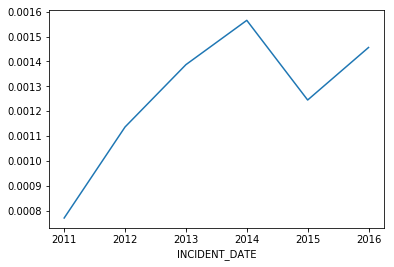

In [29]:
# Let's see what our average number injuries per year data looks like
# Looks like injuries are somewhat on the rise
df.resample('Y')['Injuries'].mean().plot()

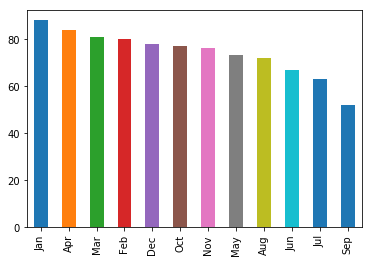

In [31]:
# Chart total number of injuries by month
# Looks like January leads in the number of injuries
df.groupby(df.index.strftime('%b'))['Injuries'].sum().nlargest(12).plot(kind='bar')

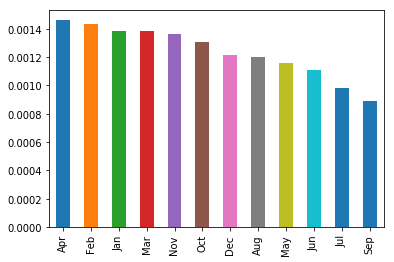

In [32]:
# But perhaps January has more injuries just because there are more calls
# So, let's chart the average number of injuries by month
# Seems the top 3 leading months are generally the same as above
df.groupby(df.index.strftime('%b'))['Injuries'].mean().nlargest(12).plot(kind='bar')

## Data Analysis - Response Types

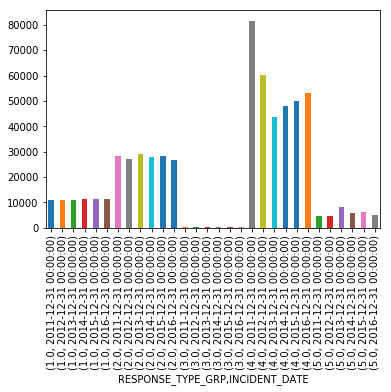

In [33]:
# Visualize the trends of response types by year
# We can see that medical calls (RESPONSE_TYPE_GRP = 4) has the highest frequency (are most common)
# Medical calls decreased from 2001 to 2013 and then started to increase again from 2013 to 2016
# Other RESPONSE_TYPE_GRPs do not appear to have changed a great deal but it's difficult to see here
df.groupby(['RESPONSE_TYPE_GRP', pd.Grouper(freq='Y')])['RESPONSE_TYPE_GRP'].count().plot(kind='bar')

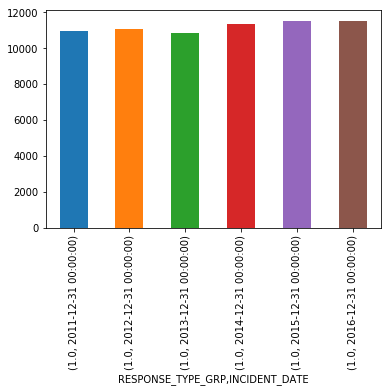

In [34]:
# Let's check out each response type individuallly 
# Not a whole lot of change to the number of fire related calls
df[df.RESPONSE_TYPE_GRP == 1].groupby(['RESPONSE_TYPE_GRP', pd.Grouper(freq='Y')])['RESPONSE_TYPE_GRP'].count().plot(kind='bar')

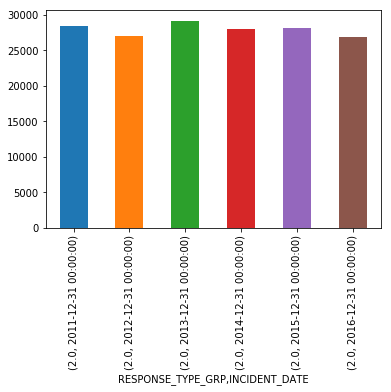

In [35]:
# Not a lot of change in the number of false alarm calls from year to year
df[df.RESPONSE_TYPE_GRP == 2].groupby(['RESPONSE_TYPE_GRP', pd.Grouper(freq='Y')])['RESPONSE_TYPE_GRP'].count().plot(kind='bar')

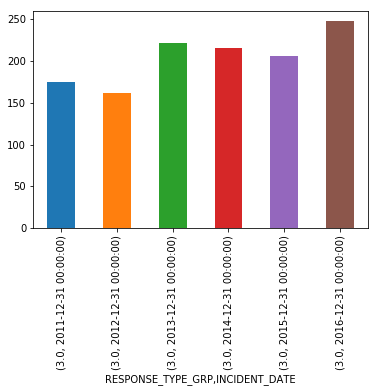

In [36]:
# There seems to be an increase in the amount of rescue calls  
df[df.RESPONSE_TYPE_GRP == 3].groupby(['RESPONSE_TYPE_GRP', pd.Grouper(freq='Y')])['RESPONSE_TYPE_GRP'].count().plot(kind='bar')

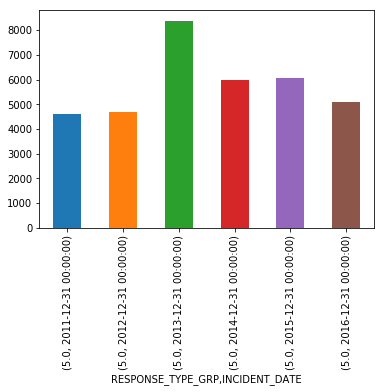

In [37]:
# There was significantly more calls of type 'other' in 2013 than in other years
df[df.RESPONSE_TYPE_GRP == 5].groupby(['RESPONSE_TYPE_GRP', pd.Grouper(freq='Y')])['RESPONSE_TYPE_GRP'].count().plot(kind='bar')

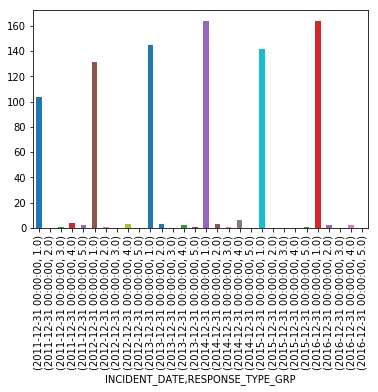

In [38]:
# Visualize the trends of injuries by response types per year
# We can see that Fire/explosion/heat related calls have the greatest number of injuries
# by far, and the number of injuries has been generally increasing since 2011 
df.groupby([pd.Grouper(freq='Y'), 'RESPONSE_TYPE_GRP'])['Injuries'].sum().plot(kind='bar')

<hr/>
<hr/>
<hr/>

In [ ]:
# Which data do we trust ...
# ... if sum of (RESCUED_ADULTS, RESCUED_CHILDREN, RESCUED_SENIORS) do not match total in RESCUES?
# ... if PHYSICAL_CONDITION_* code (2 to 8) indicates there are rescues but RESCUE* attributes indicate 0 rescues?
# ... if PHYSICAL_CONDITION_* code (1 or 98) indicates there are no rescues but RESCUE* attributes indicate >0 rescues?
# ....if PHYSICAL_CONDITION_1 code indicates there are rescues but PHYSICAL_CONDITION_2 indicates no rescues?

In [ ]:
df[df.EXTENT_FIRE.notnull() | df.EXTENT_SMOKE.notnull()][['EXTENT_FIRE','EXTENT_SMOKE','RESPONSE_TYPE','STATUS_ON_ARRIVAL','FIRE_CONTROL']].shape
df[df.EXTENT_FIRE.notnull() | df.EXTENT_SMOKE.notnull()][['EXTENT_FIRE','EXTENT_SMOKE','RESPONSE_TYPE','STATUS_ON_ARRIVAL','FIRE_CONTROL']].head()
df[df.EXTENT_FIRE.notnull() | df.EXTENT_SMOKE.notnull()]['RESPONSE_TYPE'].groupby(df['RESPONSE_TYPE']).count()

In [ ]:
df[df.RESPONSE_TYPE != 1][['EXTENT_FIRE','EXTENT_SMOKE','RESPONSE_TYPE','STATUS_ON_ARRIVAL','FIRE_CONTROL']].shape
df[df.RESPONSE_TYPE != 1][['EXTENT_FIRE','EXTENT_SMOKE','RESPONSE_TYPE','STATUS_ON_ARRIVAL','FIRE_CONTROL']].head()

In [ ]:
df[df.RESPONSE_TYPE.isnull()].shape

In [ ]:
dftemp = df[df.RESPONSE_TYPE != 1][['EXTENT_FIRE','EXTENT_SMOKE','RESPONSE_TYPE','STATUS_ON_ARRIVAL','FIRE_CONTROL']]
dftemp.head()

In [ ]:
dftemp[dftemp.EXTENT_FIRE.notnull() | dftemp.EXTENT_SMOKE.notnull() | dftemp.STATUS_ON_ARRIVAL.notnull() | dftemp.FIRE_CONTROL.notnull()]

In [ ]:
df[df.STATUS_ON_ARRIVAL.notnull() | df.FIRE_CONTROL.notnull()][['EXTENT_FIRE','EXTENT_SMOKE','RESPONSE_TYPE','STATUS_ON_ARRIVAL','FIRE_CONTROL']].head()
df[df.STATUS_ON_ARRIVAL.notnull() | df.FIRE_CONTROL.notnull()]['RESPONSE_TYPE'].groupby(df.RESPONSE_TYPE).count()

In [40]:
df.corr().abs().xs('Injuries')

AGENT_APP_HOUR                                   0.017257
AGENT_APP_MIN                                    0.001071
AGENT_APP_SEC                                    0.006541
AGE_OF_STRUCTURE                                 0.048667
AID_TO_FROM_OTHER_DEPTS                          0.002534
ALARM_TO_FD                                      0.029827
AREA_OF_ORIGIN                                   0.163447
BLD_HEIGHT                                       0.021228
BLD_STATUS                                       0.067410
CIVILIAN_FIRE_FATALITY                           0.221527
CIVILIAN_FIRE_INJURY                             0.708551
CIV_EVACUATION                                   0.105129
CIV_EVACUATION_REASON_1                          0.003241
CIV_EVACUATION_REASON_2                          0.177775
CIV_FIRE_CONTROL                                 0.027094
COMPLEX                                          0.017569
CONTROL_HOUR                                     0.017184
CONTROL_MIN   